In [1]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for thermal condutivity of TEG.

In [1]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/physicalproperties/thermalconductivity/TEG.csv')
expdata_df

,ID,ComponentName,Conductivity,Temperature,Pressure,PhaseType,Reference,StandardDeviation
0,21,TEG,0.244501,273.15,1,liquid,web,0.003042
1,23,TEG,0.239023,283.15,1,liquid,web,0.002965
2,24,TEG,0.233544,293.15,1,liquid,web,0.002889
3,25,TEG,0.228066,303.15,1,liquid,web,0.002813
4,26,TEG,0.222587,313.15,1,liquid,web,0.002737
5,27,TEG,0.217109,323.15,1,liquid,web,0.002662
6,28,TEG,0.211631,333.15,1,liquid,web,0.002586
7,29,TEG,0.206152,343.15,1,liquid,web,0.002511
8,30,TEG,0.200674,353.15,1,liquid,web,0.002435
9,31,TEG,0.195195,363.15,1,liquid,web,0.002360


<Figure size 640x480 with 0 Axes>

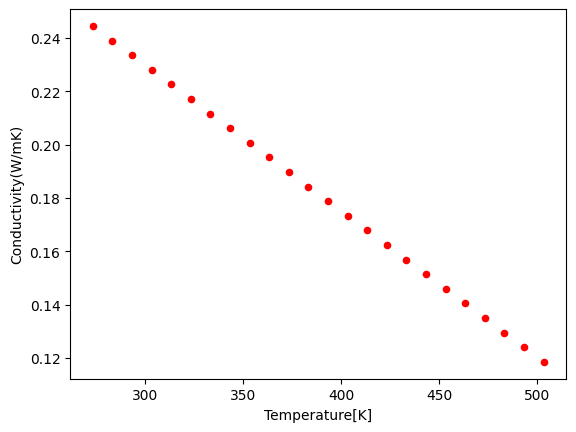

In [2]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='Temperature', y='Conductivity', kind='scatter',ylabel='Conductivity(W/mK)', xlabel='Temperature[K]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations

<Figure size 640x480 with 0 Axes>

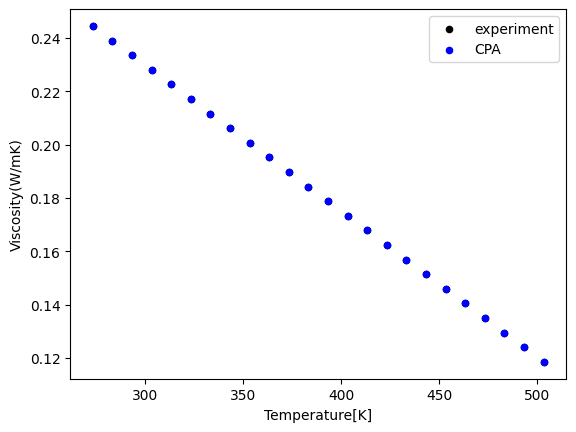

In [8]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('TEG', 1.0)
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(100.0, 'bara')

def conductivity(temp):
    fluid1.setTemperature(temp, 'K')
    try:
        TPflash(fluid1)
        fluid1.initProperties()
        return fluid1.getPhase('aqueous').getThermalConductivity('W/mK')
    except:
        return float("nan")
temperatures = expdata_df['Temperature'].values.tolist()
cond_res = [conductivity(T) for T in temperatures]

dataWithExperiment = expdata_df.assign(calc_thermcond = cond_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='Temperature', y='Conductivity', kind='scatter',ylabel='Conductivity(W/mK)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='Temperature', y='calc_thermcond', kind='scatter',ylabel='Viscosity(W/mK)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting